<center>
#CSCI-P556: Applied Machine Learning
#Fall 2018
#Assignment #2
</center>
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans:  
The number of observations differ in each of the data sets 
while train1 has 6769 observations , train2 has 28934 observations
while valid1 has 1694 observations, valid2 has 7235 observations

The target variable is balanced in train1 , has 3385 'yes' and 3385 'no'

The target variable is imbalanced in train2 , has 3385 'yes' and 25549 'no' 

The target variable is balanced in valid1 , has 846 'yes' and 846 'no'

The target variable is imbalanced in valid2 , has 846 'yes' and 6388 'no'




### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Answer for bullet one
<br> The following are continuous features : `age`, `balance`, `duration`, `campaign`, `pdays`, `previous`
2.   Answer for bullet two
<br> The follwing are categorical features: `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `day`, `month`, `poutcome`
3.   Answer for bullet three
<br> The unknown levels in `day` and `education` , I have treated them as missing values, I have first converted to NA's and then have replaced in those features with the mode of the feature. In the variable `poutcome` , I have treated the unknown level as another category itself as there are 75-80 % of unknowns in both sets
<br> In the continous variable `pdays` -1 is treated as missing and since the % of -1s in the data is more than 70% I have dropped the column


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import os 
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
os.chdir("C:/Users/ntihish/Documents/IUB/AML/Assignment 2")
# PROBLEM 1, TASK 1 CODE GOES HERE


# BankMarketing_train_1.info
# BankMarketing_train_1.shape
# BankMarketing_train_1.head()
# AllColumns = BankMarketing_train_1.columns.tolist()

#get uniques in columns
# for columns in AllColumns: 
#     print(columns, len(BankMarketing_train_1[columns].unique()))
#     print(columns, BankMarketing_train_1[columns].unique())

#transofrming all objet dtypes to categorical
def changeDtypes(df,from_dtype,to_dtype):
    #changes inplace, affects the passed dataFrame
    df[df.select_dtypes(from_dtype).columns] = df.select_dtypes(from_dtype).astype(to_dtype)

##normalising 
def normaliseContinousVars(df):
    continuousVariables = df.select_dtypes('int64').columns.tolist() + df.select_dtypes('float64').columns.tolist()
    df[continuousVariables] = df[continuousVariables].apply(lambda x : (x-x.mean())/x.std() , axis=1)


##getting variables that have missing values
# print(BankMarketing_train_1.columns[BankMarketing_train_1.isna().any()])


##recalculate the levels in all categorical variables befor one hot encoding
def dropUnusedCategories(df):
    categoricalVariables = df.select_dtypes('category').columns.tolist()
    for columns in categoricalVariables:
        df[columns] = df[columns].cat.remove_unused_categories()



##fill nas with mode of the catrgorical data for continoue replacae by median or by knn imputaion
# BankMarketing_train_1.info()
def fill_Mode_Median(df):
    continuousVariables = df.select_dtypes('int64').columns.tolist() + df.select_dtypes('float64').columns.tolist()
    categoricalVariables = df.select_dtypes('category').columns.tolist()
    df[continuousVariables] = df[continuousVariables].fillna(df[continuousVariables].median())
    df[categoricalVariables] = df[categoricalVariables].fillna(df[categoricalVariables].mode().iloc[0])#mode could have multiple values




##write a data pipleline functions
def pipelineFunc(df):
    changeDtypes(df,'object','category')
    
    #special hanling for day can be omiited or added for anotyher data set
#     df['day'] = df['day'].astype('category')
    
    #reduce number of levels in day's by binning
    #binning days 
#     df['day'] = df['day']//4
    
    df['day'] = df['day'].astype('category')
    normaliseContinousVars(df)
    df = df.drop(columns=['pdays'])
    
    #replacing unknows by NA's where the unknowns do not form more that 5-10% of the data.
    
    df[['education','job']]= df[['education','job']].replace('unknown' , np.nan)
    
    
    #adjusting categories as unknown was considered as category
    dropUnusedCategories(df)
    
    ##making a copy to avoid warnings 
    ##splittnig Predictors and Target variables
    df_X = df.iloc[:,:-1].copy()
    
    df_Y = df.iloc[:,[-1]].copy()
    
    ##fill median for continous and mode for categorical
    fill_Mode_Median(df_X)
    
    ##listing cateorical variables
    categoricalVariables = df_X.select_dtypes('category').columns.tolist()
    continuousVariables = df.select_dtypes('int64').columns.tolist() + df.select_dtypes('float64').columns.tolist()
#     print("the follwing are the categorical variables : ", categoricalVariables)
#     print("the follwing are the caontinous variables : ", continuousVariables)
    
    ##one hot encoding
    df_X = pd.get_dummies(df_X,drop_first= True)
    
    #target varibale conversion to levels
    yesNoMapping = {'yes': 1 ,'no' : 0}
    df_Y['y'] = df_Y['y'].map(yesNoMapping)
    
    return df_X , df_Y

BankMarketing_train_1 = pd.read_csv("train_1.csv")
BankMarketing_train_2 = pd.read_csv("train_2.csv")
BankMarketing_valid_1 = pd.read_csv("valid_1.csv")
BankMarketing_valid_2 = pd.read_csv("valid_2.csv")
BankMarketing_test = pd.read_csv("test.csv")
BankMarketing_train_1_X ,BankMarketing_train_1_Y = pipelineFunc(BankMarketing_train_1)
BankMarketing_train_2_X ,BankMarketing_train_2_Y = pipelineFunc(BankMarketing_train_2)
BankMarketing_valid_1_X ,BankMarketing_valid_1_Y = pipelineFunc(BankMarketing_valid_1)
BankMarketing_valid_2_X ,BankMarketing_valid_2_Y = pipelineFunc(BankMarketing_valid_2)
BankMarketing_test_X,BankMarketing_test_Y = pipelineFunc(BankMarketing_test)




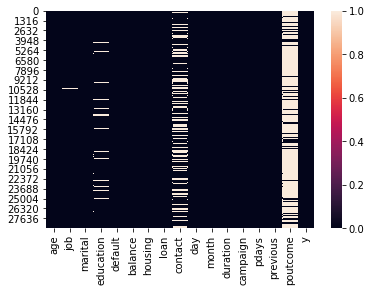

In [2]:
BankMarketing_train_1_Orig = pd.read_csv("train_2.csv")

# BankMarketing_train_1_Orig[['education','job']]= BankMarketing_train_1_Orig[['education','job']].replace('unknown' , np.nan)
sb.heatmap(BankMarketing_train_1_Orig == 'unknown')

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

lamda optimal  is : 0.1


,TrainAccuracyAtOptimalLam,ValidAccuracyAtOptimalLam,TestAccuracyAtOptimalLam
0,0.810903,0.804489,0.80648


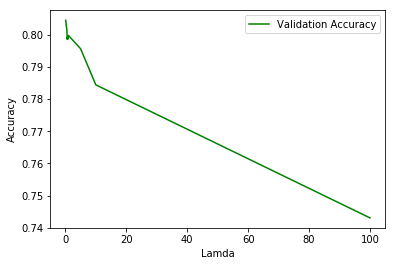

In [3]:
# PROBLEM 1, TASK 2 CODE GOES HERE
 
import sklearn.linear_model

lamdas = [0.1 ,0.2,0.3,0.5,0.6,0.7,0.8,0.9, 1,5,10,100]
# smaller the value more the regularisation
invLam = [1/i for i in lamdas]

accu_Valid = []
accu_Train = []
accu_Test = []
for lam in invLam:
    logi = sklearn.linear_model.LogisticRegression(penalty= 'l2', C = lam)
    logi.fit(BankMarketing_train_1_X,BankMarketing_train_1_Y['y'])
    accu_Train.append(logi.score(BankMarketing_train_1_X,BankMarketing_train_1_Y['y']))
    accu_Valid.append(logi.score(BankMarketing_valid_1_X,BankMarketing_valid_1_Y['y']))
    accu_Test.append(logi.score(BankMarketing_test_X,BankMarketing_test_Y['y']))
    

plt.plot(lamdas,accu_Valid,color = 'green',label = "Validation Accuracy")
# plt.plot(lamdas,accu_Train,color = 'red', label = "Training Accuracy")
plt.legend()
# oplimalLambda = lamdas[np.where(abs(np.subtract(accu_Train,accu_Valid)) ==  abs(np.subtract(accu_Train,accu_Valid)).min())[0][0]]


TestAccuracyAtOptimalLam = accu_Test[accu_Valid.index(max(accu_Valid))]
TrainAccuracyAtOptimalLam = accu_Train[accu_Valid.index(max(accu_Valid))]
ValidAccuracyAtOptimalLam = accu_Valid[accu_Valid.index(max(accu_Valid))]
oplimalLambda = lamdas[accu_Valid.index(max(accu_Valid))]
plt.xlabel("Lamda")
plt.ylabel("Accuracy")
print("lamda optimal  is :",oplimalLambda)
pd.DataFrame({'TrainAccuracyAtOptimalLam':[TrainAccuracyAtOptimalLam],
              'ValidAccuracyAtOptimalLam':[ValidAccuracyAtOptimalLam],
              'TestAccuracyAtOptimalLam':[TestAccuracyAtOptimalLam],
             })

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

lamda optimal  is : 1


,TrainAccuracyAtOptimalLam,ValidAccuracyAtOptimalLam,TestAccuracyAtOptimalLam
0,0.897249,0.899502,0.89749


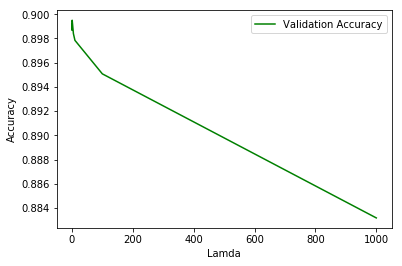

In [4]:
# PROBLEM 1, TASK 3 CODE GOES HERE

lamdas = [0.1 ,0.2,0.3,0.5,0.6,0.7,0.8,0.9, 1,5,10,100,1000]  # smaller the value more the regularisation
invLam = [1/i for i in lamdas]
accu_Valid = []
accu_Train = []
accu_Test = []
for lam in invLam:
    logi = sklearn.linear_model.LogisticRegression(penalty= 'l2', C = lam)
    logi.fit(BankMarketing_train_2_X,BankMarketing_train_2_Y['y'])
    accu_Train.append(logi.score(BankMarketing_train_2_X,BankMarketing_train_2_Y['y']))
    accu_Valid.append(logi.score(BankMarketing_valid_2_X,BankMarketing_valid_2_Y['y']))
    accu_Test.append(logi.score(BankMarketing_test_X,BankMarketing_test_Y['y']))
plt.plot(lamdas,accu_Valid,color = 'green',label = "Validation Accuracy")
# plt.plot(lamdas,accu_Train,color = 'red', label = "Training Accuracy")
plt.legend()
plt.xlabel("Lamda")
plt.ylabel("Accuracy")
pctChange = abs(np.subtract(accu_Valid,accu_Train)/np.array(accu_Train))

TestAccuracyAtOptimalLam = accu_Test[accu_Valid.index(max(accu_Valid))]
TrainAccuracyAtOptimalLam = accu_Train[accu_Valid.index(max(accu_Valid))]
ValidAccuracyAtOptimalLam = accu_Valid[accu_Valid.index(max(accu_Valid))]
oplimalLambda = lamdas[accu_Valid.index(max(accu_Valid))]


print("lamda optimal  is :",oplimalLambda)
pd.DataFrame({'TrainAccuracyAtOptimalLam':[TrainAccuracyAtOptimalLam],
              'ValidAccuracyAtOptimalLam':[ValidAccuracyAtOptimalLam],
              'TestAccuracyAtOptimalLam':[TestAccuracyAtOptimalLam],
             })

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

,Lamda,Theta,TrainAccuracy,ValidationAccuracy,TestAccuracy,AccuracyDiff
34,1.0,0.4,0.896938,0.900746,0.896052,0.003809


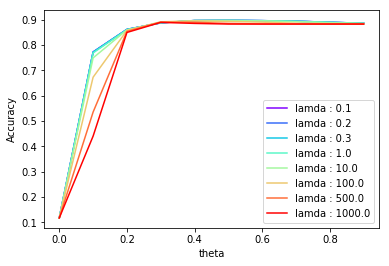

In [5]:
# PROBLEM 1, TASK 4 CODE GOES HERE

from sklearn.metrics import accuracy_score
lamdas = [0.1 ,0.2,0.3,1,10,100,500,1000] # smaller the value more the regularisation
invLam = [1/i for i in lamdas] # smaller the value more the regularisation
Threshold = [i*0.1  for  i in range(0,10,1)]

LamdaThreshAccu = {'Lamda':[],'Theta':[],'TrainAccuracy':[],'ValidationAccuracy':[],'TestAccuracy':[],'AccuracyDiff': []}

colors = cm.rainbow(np.linspace(0, 1, len(lamdas)))
for eachLamda,color in zip(invLam,colors):
    listOfAccuracy = []
    logi = sklearn.linear_model.LogisticRegression(penalty= 'l2', C = eachLamda)
    for diffThreshs in Threshold:
        
        logi.fit(BankMarketing_train_2_X,BankMarketing_train_2_Y['y'])
        logi.classes_ # 0,1
        
        ##train accuracy
        Y_train_pred = logi.predict_proba(BankMarketing_train_2_X)[:,1] >= diffThreshs
        Y_train_pred = Y_train_pred.astype(int)
        
        trainAccuracy = accuracy_score(BankMarketing_train_2_Y['y'],Y_train_pred) 
        
        ##valid Accuracy
        Y_valid_pred = logi.predict_proba(BankMarketing_valid_2_X)[:,1] >= diffThreshs
        Y_valid_pred = Y_valid_pred.astype(int)
        
        validationAccuracy = accuracy_score(BankMarketing_valid_2_Y['y'],Y_valid_pred)
        
        ##test Accuracy
        Y_test_pred = logi.predict_proba(BankMarketing_test_X)[:,1] >= diffThreshs
        Y_test_pred = Y_test_pred.astype(int)
        
        TestAccuracy = accuracy_score(BankMarketing_test_Y['y'],Y_test_pred)
        
        
        
        
        ##collecting data of all runs
        listOfAccuracy.append(trainAccuracy)
        ##can make it more readable ## TO DO
        LamdaThreshAccu['Lamda'].append(1/eachLamda)
        LamdaThreshAccu['Theta'].append(diffThreshs)
        LamdaThreshAccu['TrainAccuracy'].append(trainAccuracy)
        LamdaThreshAccu['ValidationAccuracy'].append(validationAccuracy)
        LamdaThreshAccu['TestAccuracy'].append(TestAccuracy)
        LamdaThreshAccu['AccuracyDiff'].append(abs(validationAccuracy-trainAccuracy))
        
        
        
#         tp,fn,fp,tn = sklearn.metrics.confusion_matrix(BankMarketing_valid_2_Y['y'],Y_pred,labels = [1,0]).ravel()
#         # np.unique(Y_pred,return_counts=True)
#         accuracy = (tp+tn)/Y_pred.size
        
#         .append(accuracy)
    ##plot for each lamda the effct of threshold change
    plt.plot(Threshold,listOfAccuracy,color = color,label = ("lamda : " + str(1/eachLamda)))

plt.xlabel("theta")
plt.ylabel("Accuracy")
plt.legend()
plt.show
LamdaThreshAccuDf = pd.DataFrame(LamdaThreshAccu)
##best lamda and thresh combinations
# LamdaThreshAccuDf[(LamdaThreshAccuDf['AccuracyDiff']/LamdaThreshAccuDf['TrainAccuracy'])
#                   ==(LamdaThreshAccuDf['AccuracyDiff']/LamdaThreshAccuDf['TrainAccuracy']).min()]

maxValAccu = LamdaThreshAccuDf[LamdaThreshAccuDf['ValidationAccuracy']==LamdaThreshAccuDf['ValidationAccuracy'].max()]

maxValAccu[maxValAccu['AccuracyDiff']==maxValAccu['AccuracyDiff'].min()]

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.
#### Answers :

**1.**
<br> Models $\mathcal{A}$ :  at the optimal lambda 0.1 , Train Accuracy is 0.810903, Validation Accuracy :0.804489, Test Accuracy:	0.80648:  
<br> Model $\mathcal{B}$ :at the optimal lambda 1 , Train Accuracy is 0.897249, Validation Accuracy :0.899502, Test Accuracy:	0.89749 : 
<br> Model $\mathcal{C}$ :at the optimal lambda 1 and theta 0.4 , Train Accuracy is 0.896938, Validation Accuracy :0.900746, Test Accuracy:	0.896052

<br> In the model A since it used a training set of small data, the accuracy was lesser since it did not have enough examples to train on.The lambda for maximising the validation accuracy was 0.1
<br> In the Model B since it had a larger training set , the accuracy was higher. The best regularisation parameter for maximisng validation accuracy turns out to be 1
<br> For Model C  by finding the best lambda and  theta (threshhold) it turns out that the best threshhold is 0.4 and lambda is 1. Validation accuracy improves slightly. 


**2.**
Yes I think the accuracy , i.e validation accuracy is a good measure to  tune the hyper parameter. Since the validation data is unseen to the model. Tuning the model basing the validation accuracy is a good measure

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

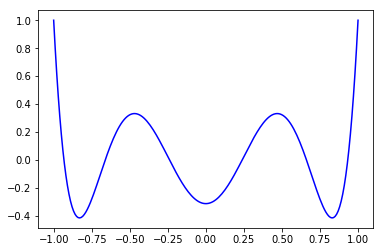

In [6]:
import numpy as np
from scipy.special import legendre

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1] ##returning from the end 

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    X_Orig = np.linspace(low, high, int((high-low)/0.01))
    X = np.array([X_Orig]*(degree+1)).T
    powers = np.array([i for i in range(degree+1)])
    X = np.power(X,powers)
    y = w.dot(X.T)
    
    
    plt.plot(X_Orig,y,color = 'blue',label = "funtions")
    

## TEST CASES (The following lines should plot a function)
# visualize_function(2, -1, 1)
# visualize_function(4, -1, 1)
visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [7]:
from sklearn.model_selection import train_test_split
import random
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    
    random.seed(56)
    np.random.seed(56)
    w = get_coefficients(degree)
    X_Orig = np.random.uniform(-1,1, n_train+n_test)
    X = np.array([X_Orig]*(degree+1)).T #generating all powers of X and transposing has [[x,x,x,x],[x,x,x,x]]
    powers = np.array([i for i in range(degree+1)])
    X = np.power(X,powers)#has [1,x,x^2,....]
    y = w.dot(X.T)+ np.random.normal(0,sigma,X_Orig.size)
    trainIndices = random.sample(range(X_Orig.size),n_train)
#     print(X_Orig)
#     print(y)
    X_train = X_Orig[trainIndices]
    y_train = y[trainIndices]
    X_test = np.delete(X_Orig, trainIndices)
    y_test =  np.delete(y, trainIndices)
    
    
    return X_train, y_train, X_test, y_test

# generate_dataset(2,2,2,0.2)


### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.


 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

### Answers: 
3. I have first generated a matrix of x raised to different powers using PolynomialFeatures(degree).fit_transform() method and then fed it to linear regressor. 
5. The results are infact surprising because, though we are fitting the exact 10 degree polynomial function from which the data is generated, the test error for degree 10 is high. This is because of the noise, the model with 10 degree polynomial overfits the data with noise and is too specific to the variations due to insignificant noise. Hence would result in high testing error since its unseen data. However  for degree 2 polynomial model since it  doesnot fit all the points exactly and not much affected with noise.This would mean that in test it performs comparable to the training and % change is not as high as deg 10.

<br> Basically, the bias for deg2 polynomial model was more but variance was less and bias is less for deg10 polynomial model and variance is high.

<br> Please refer the table before task4 question to support that the change in train to test errors is higher for a higher degree polynomial.

Text(0,0.5,'Y')

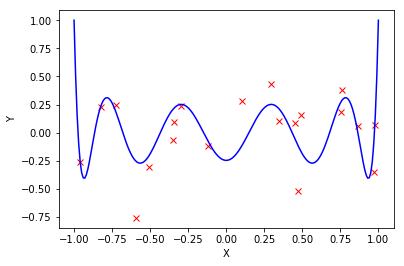

In [8]:

###Task 3.1,3.2

##generating data set with 10 degrees
X_train, y_train, X_test, y_test = generate_dataset(10,20,20,0.2)

#plot points
plt.plot(X_train,y_train,'rx')

#plot functions
visualize_function(10, -1, 1)
plt.xlabel("X")
plt.ylabel("Y")



In [9]:
#Task 3.3,3.4

import sklearn.preprocessing
def getTrainTestErros(degree,X_train, y_train, X_test, y_test):
    
    Linear = sklearn.linear_model.LinearRegression()

    polyGen = sklearn.preprocessing.PolynomialFeatures(degree) 

    X_train_transform = polyGen.fit_transform(X_train.reshape(-1, 1))##generating [1,x^2,x^3,...]
    X_test_transform = polyGen.fit_transform(X_test.reshape(-1, 1))##generating [1,x^2,x^3,...]

    ##fitting polynommial regression
    Linear.fit(X_train_transform,y_train) 


    y_train_pred = Linear.predict(X_train_transform)
    trainError = (((y_train - y_train_pred) ** 2).sum())/ y_train.size
    trainAccuracy = Linear.score(X_train_transform,y_train)
#     print(trainAccuracy)
#     print("Mean train Error is :",((y_train - y_train_pred) ** 2).sum() / y_train.size)



    y_test_pred = Linear.predict(X_test_transform)
    testError = (((y_test - y_test_pred) ** 2).sum())/ y_test.size
    testAccuracy = Linear.score(X_test_transform,y_test)
#     print(testAccuracy)
#     print("Mean test Error is :",((y_test - y_test_pred) ** 2).sum() / y_test.size)
    return trainError, testError ,trainAccuracy,testAccuracy



#####getting errors for 10 and 2 degree
X_train, y_train, X_test, y_test = generate_dataset(10,20,20,0.2)
deg2TrainError,deg2TestError, deg2TrainAccuracy,deg2TestAccuracy = getTrainTestErros(2,X_train, y_train, X_test, y_test)
deg10TrainError,deg10TestError,deg10TrainAccuracy, deg10TestAccuracy = getTrainTestErros(10,X_train, y_train, X_test, y_test)

pctChangeDeg2 = (deg2TestError-deg2TrainError)/deg2TrainError
pctChangeDeg10 = (deg10TrainError-deg10TestError)/deg10TrainError

print("The test and train errors for the dataset generated from degree 10 polynomial with noise when fit with degree 2 and degree 10 polynomial is as below ")
Table = pd.DataFrame({'train Error':[deg2TrainError,deg10TrainError],'test Error':[deg2TestError,deg10TestError]},index = ['deg 2','deg 10'])
Table
# (Table["test"] - Table['train'])/Table['train']
# Table = pd.DataFrame({'train accuracy':[deg2TrainAccuracy,deg10TrainAccuracy],'test accuracy':[deg2TestAccuracy,deg10TestAccuracy]},index = ['deg 2','deg 10'])
# Table


The test and train errors for the dataset generated from degree 10 polynomial with noise when fit with degree 2 and degree 10 polynomial is as below 


,train Error,test Error
deg 2,0.085086,0.090719
deg 10,0.028364,0.061074


In [10]:
degTrainErrorList = []
degTestErrorList = []
ErrorChangeList = []
degreeList = [i for i in range(2,11,1)]

for degree in degreeList:
    degTrainError,degTestError, degTrainAccuracy,degTestAccuracy = getTrainTestErros(degree,X_train, y_train, X_test, y_test)
    degTrainErrorList.append(degTrainError)
    degTestErrorList.append(degTestError)
    ErrorChangeList.append((degTestError-degTrainError)/degTrainError)
    
print("Please observe that the pct change in errors from train to test is higher in higher degree polynomial")
Table = pd.DataFrame({'degrees' : degreeList,
                      'train error':degTrainErrorList,
                      'test error':degTestErrorList,
                      'percentatge Change' : ErrorChangeList}
                     )
Table

Please observe that the pct change in errors from train to test is higher in higher degree polynomial


,degrees,train error,test error,percentatge Change
0,2,0.085086,0.090719,0.066210
1,3,0.082106,0.101061,0.230861
2,4,0.082106,0.101061,0.230863
3,5,0.082013,0.100481,0.225189
4,6,0.059620,0.138590,1.324546
5,7,0.055886,0.128658,1.302160
6,8,0.053630,0.120937,1.254999
7,9,0.045932,0.146712,2.194089
8,10,0.028364,0.061074,1.153214


### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

### Answers:
1. Since there is no noise in the data and was generated from a 45 degree polynomial, it can be seen that the model with higher degree polynomial would always perform better both in test and train and the closer the degree of the polynomial to the '45' , the lesser the error would turn out in both test and train. 
<br> Howeever the error in test  would start to increase as the degree of the polynomial crosses the 45 since the polynomial starts to overfit the data and end up performing bad on the test data.
The same can be seen in the below graph. The Test error starts to raise after the dip till 45 degree polynomial and train error continues to reduce(the code for the same and dynamic graph is in the cell after the Task 4.)
But the variation of the error from the training to test is always lesser for a lower complex model.

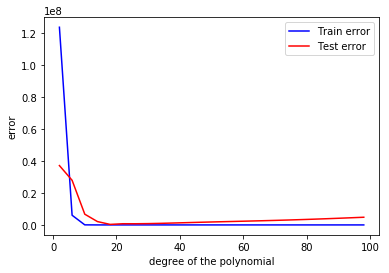
<br>**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

,train error,test error
deg 2,1.234738e+08,3.707142e+07
deg 10,3.566454e+04,6.696736e+06


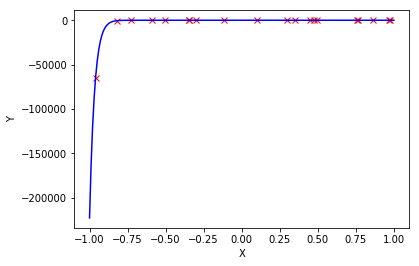

In [11]:
X_train, y_train, X_test, y_test = generate_dataset(45,20,20,0)
plt.plot(X_train,y_train,'rx')
visualize_function(45, -1, 1)
plt.xlabel("X")
plt.ylabel("Y")



deg2TrainError,deg2TestError, deg2TrainAccuracy,deg2TestAccuracy = getTrainTestErros(2,X_train, y_train, X_test, y_test)
deg10TrainError,deg10TestError,deg10TrainAccuracy, deg10TestAccuracy = getTrainTestErros(10,X_train, y_train, X_test, y_test)


Table = pd.DataFrame({'train error':[deg2TrainError,deg10TrainError],
                      'test error':[deg2TestError,deg10TestError]},
                     index = ['deg 2','deg 10'])
Table




# Table = pd.DataFrame({'train accuracy':[deg2TrainAccuracy,deg10TrainAccuracy],'test accuracy':[deg2TestAccuracy,deg10TestAccuracy]},index = ['deg 2','deg 10'])
# Table
# (Table["test"] - Table['train'])/Table['train']


The below plot is to to show the trend of the error change in test and train as the degree of the polynomial changes 


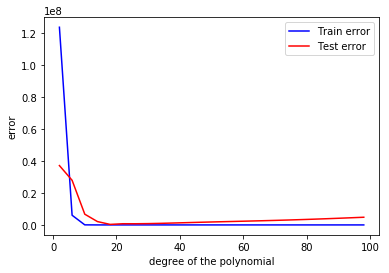

In [12]:

"""
The below plot is to to show the trend of the error change in test and train as the degree of the polynomial changes 
"""

degTrainErrorList = []
degTestErrorList = []

degreeList = [i for i in range(2,100,4)]

for degree in degreeList:
    degTrainError,degTestError, degTrainAccuracy,degTestAccuracy = getTrainTestErros(degree,X_train, y_train, X_test, y_test)
    degTrainErrorList.append(degTrainError)
    degTestErrorList.append(degTestError)
    



print("The below plot is to to show the trend of the error change in test and train as the degree of the polynomial changes ")
plt.plot(degreeList,degTrainErrorList,'b', label = "Train error")
plt.plot(degreeList,degTestErrorList,'r', label = "Test error")

plt.xlabel("degree of the polynomial")
plt.ylabel("error")
plt.legend()
plt.show()
# deg2TrainErrorList